# 3. Permutations

In [26]:
from collections import Counter
from sympy import (
    factorial,
    factor_list,
    init_printing,
    poly,
    symbols
)
from sympy.abc import x
from sympy.combinatorics import Permutation
from sympy.combinatorics.named_groups import SymmetricGroup
from sympy.combinatorics.perm_groups import PermutationGroup
from sympy.plotting import plot

init_printing(perm_cyclic = False)

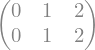

In [27]:
p = Permutation(2)
p

In [28]:
p.array_form

In [29]:
p.size

In [30]:
p.cardinality

In [31]:
factorial(-2)

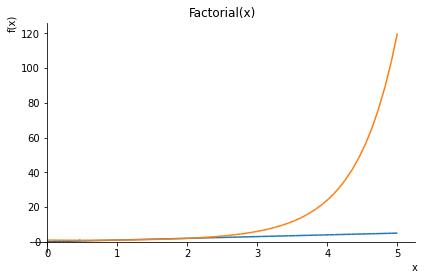

In [32]:
p1 = plot(x, (x, 0, 5), show = False, title = "Factorial(x)")
p2 = plot(factorial(x), (x, 0, 5), show = False, line_color = "C1")
p1.append(p2[0])
p1.show()

In [33]:
group = [1, 2, 3]
q = p
while q:
    print(q(group))
    q = q.next_lex()

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


In [34]:
q = p
while q:
    print(q.cyclic_form)
    q = q.next_lex()

[]
[[1, 2]]
[[0, 1]]
[[0, 1, 2]]
[[0, 2, 1]]
[[0, 2]]


In [35]:
q = p
while q:
    print(q.full_cyclic_form)
    q = q.next_lex()

[[0], [1], [2]]
[[0], [1, 2]]
[[0, 1], [2]]
[[0, 1, 2]]
[[0, 2, 1]]
[[0, 2], [1]]


In [36]:
q = p
q = q.next_lex()
{i: q(group)[i] for i in range(p.size)}

In [37]:
x1, x2, x3, x4 = symbols("x1, x2, x3, x4")
indeterminates = [x1, x2, x3, x4]
args = {x1: 1, x2: 2, x3: 3, x4: 4}

x = Permutation(len(indeterminates) - 1)

def expr1(lst):
    return (lst[0] + lst[1]) * (lst[2] + lst[3])

expr1(x(indeterminates))

In [38]:
factor_list(expr1(x(indeterminates)))

In [39]:
def calculate_poly(expression, args):
    pol = poly(expression)
    return pol.eval(args)

calculate_poly(expr1(x(indeterminates)), args)

In [40]:
def count_permutation_results(expr, args, perms, indeterminates):
    permutation = perms(indeterminates)
    original_result = calculate_poly(expr(permutation), args)
    results = []
    while perms:
        permutation = perms(indeterminates)
        result = calculate_poly(expr(permutation), args)
        if result == original_result:
            results.append("unchanged")
        else:
            results.append("changed")
        perms = perms.next_lex()
    return Counter(results)

count_permutation_results(expr1, args, x, indeterminates)

Counter({'unchanged': 8, 'changed': 16})

In [41]:
def expr2(lst):
    fctr_1 = lst[0] - lst[1]
    fctr_2 = lst[0] - lst[2]
    fctr_3 = lst[0] - lst[3]
    fctr_4 = lst[1] - lst[2]
    fctr_5 = lst[1] - lst[3]
    fctr_6 = lst[2] - lst[3]
    return  fctr_1 * fctr_2 * fctr_3 * fctr_4 * fctr_5 * fctr_6

expr2(x(indeterminates))

In [42]:
count_permutation_results(expr2, args, x, indeterminates)

Counter({'unchanged': 12, 'changed': 12})

In [43]:
def expr3(lst):
    return (lst[0] - lst[1]) * (lst[2] - lst[3])

expr3(x(indeterminates))

In [44]:
count_permutation_results(expr3, args, x, indeterminates)

Counter({'unchanged': 4, 'changed': 20})

In [45]:
def get_permutation_group(expr, args, perms, indeterminates):
    permutation = perms(indeterminates)
    original_result = calculate_poly(expr(permutation), args)
    unchanged = []
    while perms:
        permutation = perms(indeterminates)
        result = calculate_poly(expr(permutation), args)
        if result == original_result:
            unchanged.append(perms)
        perms = perms.next_lex()
    unchanged_group = PermutationGroup(unchanged)
    return unchanged_group 

unchanged = get_permutation_group(expr3, args, x, indeterminates)

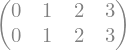

In [46]:
unchanged.identity

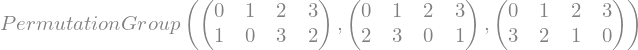

In [47]:
unchanged # this is also known as the 4 group

In [48]:
# group operator on members of a permutation group returns member of the group
unchanged.identity * unchanged[0] in unchanged

True

In [49]:
unchanged[0] * unchanged[2] in unchanged

True

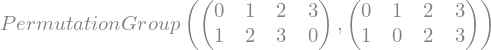

In [50]:
sym_group = SymmetricGroup(4)
sym_group